# CH. 7 - TOPIC MODELS
## Exercises

#### Exercise 7.01: Load Libraries

In [1]:
# not necessary

# put this in to block deprecation warnings
# from pyLDAvis

import warnings
warnings.filterwarnings('ignore')

In [2]:
import langdetect  # language detection
import matplotlib.pyplot  # plotting
import nltk  # natural language processing
import numpy  # arrays and matrices
import pandas  # dataframes
import pyLDAvis  # plotting
import pyLDAvis.sklearn  # plotting
import regex  # regular expressions
import sklearn  # machine learning

In [3]:
# installing specific word dictionarys
# used for stopword removal and lemmatization

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
%matplotlib inline

#### Exercise 7.02: Load and Examine Data

In [5]:
# define path and load data

path = "News_Final.csv"
df = pandas.read_csv(path, header=0)

In [6]:
# define quick look function for data frame

def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))

In [7]:
dataframe_quick_look(df, nrows=2)

SHAPE:
(93239, 11)

COLUMN NAMES:
Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

HEAD:
    IDLink                                             Title  \
0  99248.0  Obama Lays Wreath at Arlington National Cemetery   
1  10423.0       A Look at the Health of the Chinese Economy   

                                            Headline     Source    Topic  \
0  Obama Lays Wreath at Arlington National Cemete...  USA TODAY    obama   
1  Tim Haywood, investment director business-unit...  Bloomberg  economy   

           PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  2002-04-02 00:00:00        0.000000          -0.053300        -1   
1  2008-09-20 00:00:00        0.208333          -0.156386        -1   

   GooglePlus  LinkedIn  
0          -1        -1  
1          -1        -1  



In [8]:
# data set came with prespecified topics
# print the topics out with counts

print("TOPICS:\n{topics}\n".format(topics=df["Topic"].value_counts()))

TOPICS:
economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64



In [9]:
# lets look at the final data we are going to move forward with

raw = df["Headline"].tolist()
print("HEADLINES:\n{lines}\n".format(lines=raw[:5]))
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor', 'Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.', "Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions", "Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday. ", 'Tourism and public spending continued to boost the economy in January, in light of contraction in private consumption and exports, according to the Bank of Thailand data. ']

LENGTH:
93239



#### Exercise 7.03: Step-by-step Data Cleaning

In [10]:
# select one headline to use as an example

example = raw[5]
print(example)

Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm 


In [11]:
# check language of headline
# filter to english only

def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

In [12]:
print("DETECTED LANGUAGE:\n{lang}\n".format(lang=do_language_identifying(example)))

DETECTED LANGUAGE:
en



In [13]:
# tokenize the data

example = example.split(" ")
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'http://www.prweb.com/releases/2016/03/prweb13238571.htm', '']


In [14]:
# find and replace website addresses

example = [
    'URL' if bool(regex.search("http[s]?://", i)) 
    else i for i in example
]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [15]:
# remove punctuation

example = [regex.sub("[^\\w\\s]|\n", "", i) for i in example]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '29', '2016', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [16]:
# remove numbers

example = [regex.sub("^[0-9]*$", "", i) for i in example]
print(example)

['Over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '', '', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [17]:
# make everything lowercase

example = [i.lower() if i not in ["URL"] else i for i in example]
print(example)

['over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', '', '', 'read', 'the', 'full', 'story', 'at', 'URL', '']


In [18]:
# remove the url placeholder

example = [i for i in example if i not in ["URL",""]]
print(example)

['over', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', 'read', 'the', 'full', 'story', 'at']


In [19]:
# remove stopwords
# uses stopwords dictionary previously loaded

list_stop_words = nltk.corpus.stopwords.words("English")
list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
print(list_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [20]:
example = [i for i in example if i not in list_stop_words]
print(example)

['attendees', 'expected', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [21]:
# perform lemmatization
# uses wordnet dictionary previously loaded

def do_lemmatizing(wrd):
    out = nltk.corpus.wordnet.morphy(wrd)
    return (wrd if out is None else out)

In [22]:
example = [do_lemmatizing(i) for i in example]
print(example)

['attendee', 'expect', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [23]:
# remove words less than 5 characters long

example = [i for i in example if len(i) >= 5]
print(example)

['attendee', 'expect', 'latest', 'version', 'microsoft', 'dynamics', 'dynamics', 'prweb', 'february', 'story']


#### Exercise 7.04: Complete Data Cleaning

In [24]:
# define consolidated data cleaning function

def do_headline_cleaning(txt):
    # identify language of tweet
    # return null if language not english
    lg = do_language_identifying(txt)
    if lg != 'en':
        return None
    
    # split the string on whitespace
    out = txt.split(" ")
    
    # identify urls
    # replace with URL
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
    
    # remove all punctuation
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
    
    # remove all numerics
    out = [regex.sub("^[0-9]*$", "", i) for i in out]
    
    # make all non-keywords lowercase
    out = [i.lower() if i not in ["URL"] else i for i in out]
    
    # remove URL
    out = [i for i in out if i not in ["URL",""]]
    
    # remove stopwords
    list_stop_words = nltk.corpus.stopwords.words("english")
    list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # lemmatizing
    out = [do_lemmatizing(i) for i in out]
    
    # keep words 5 or more characters long
    out = [i for i in out if len(i) >= 5]
    
    return out

from time import time

In [25]:
# execute function
# takes several minutes
tick = time()
clean = list(map(do_headline_cleaning, raw))
print(time()-tick)

681.1741757392883


In [26]:
# remove none types

clean = list(filter(None.__ne__, clean))
print("HEADLINES:\n{lines}\n".format(lines=clean[:5]))
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['obama', 'wreath', 'arlington', 'national', 'cemetery', 'president', 'barack', 'obama', 'wreath', 'unknown', 'honor'], ['haywood', 'investment', 'director', 'businessunit', 'income', 'discus', 'china', 'beige', 'state', 'economy'], ['nouriel', 'roubini', 'professor', 'chairman', 'roubini', 'global', 'economics', 'explain', 'global', 'economy', 'facing', 'conditions'], ['finland', 'economy', 'expand', 'marginally', 'three', 'month', 'december', 'contracting', 'previous', 'quarter', 'preliminary', 'figure', 'statistics', 'finland', 'monday'], ['tourism', 'public', 'spending', 'continue', 'boost', 'economy', 'january', 'light', 'contraction', 'private', 'consumption', 'export', 'accord', 'thailand']]

LENGTH:
92946



In [27]:
# turn tokens back into string
# concatenate with white spaces

clean_sentences = [" ".join(i) for i in clean]

In [28]:
print(clean_sentences[0:10])

['obama wreath arlington national cemetery president barack obama wreath unknown honor', 'haywood investment director businessunit income discus china beige state economy', 'nouriel roubini professor chairman roubini global economics explain global economy facing conditions', 'finland economy expand marginally three month december contracting previous quarter preliminary figure statistics finland monday', 'tourism public spending continue boost economy january light contraction private consumption export accord thailand', 'attendee expect latest version microsoft dynamics dynamics prweb february story', 'ramallah february palestine liberation organization sectretarygeneral erekat thursday express concern kenyan president uhuru kenyattas visit jerusalem jordan valley', 'first michelle obama speak state white house washington wednesday interactive student workshop musical legacy charles student school community organization across country participate quotin performance white housequot se

#### Exercise 7.05: Count Vectorizer

In [29]:
# define some global variables

number_words = 10
number_docs = 10
number_features = 1000

In [30]:
# execute bag of words model
# use raw term counts for lda 
# as it is a probabilistic graphical model

vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features
)
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

feature_names_vec1 = vectorizer1.get_feature_names()

  (0, 408)	1
  (0, 88)	1
  (0, 644)	1
  (0, 558)	1
  (0, 573)	2


#### Exercise 7.06: Select Number of Topics

In [31]:
# define function to calculate perplexity for LDA model trained on ntopics

def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0
        )
        lda.fit(data)
        
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        
    output_df = pandas.DataFrame(output_dict)
    
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
        
    return (output_df, output_num_topics)

In [32]:
# find perplexity scores for several different numbers of topics
# takes several minutes

df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    clean_vec1, 
    ntopics=[1, 2, 3, 4, 6, 8, 10]
)

In [33]:
print(df_perplexity)

   Number Of Topics  Perplexity Score
0                 1        510.040098
1                 2        457.833534
2                 3        409.122014
3                 4        433.104230
4                 6        507.485482
5                 8        560.085934
6                10        577.715983


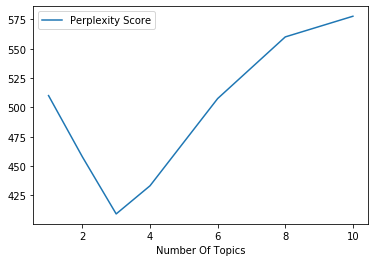

In [35]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

#### Exercise 7.07: Latent Dirichlet Allocation

In [36]:
# define and fit LDA model

lda = sklearn.decomposition.LatentDirichletAllocation(
    n_components=optimal_num_topics,
    learning_method="online",
    random_state=0
)
lda.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [37]:
# output matrix
# h: docs to topics

lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(92946, 3)
[[0.04761958 0.90419577 0.04818465]
 [0.04258906 0.04751535 0.90989559]
 [0.16656181 0.04309434 0.79034385]
 ...
 [0.0399815  0.51492894 0.44508955]
 [0.06918206 0.86099065 0.06982729]
 [0.48210053 0.30502833 0.21287114]]


In [38]:
# output matrix
# w: words to topics

lda_components = lda.components_
print(lda_components.shape)
print(lda_components)

(3, 1000)
[[3.35570079e-01 1.98879573e+02 9.82489014e+00 ... 3.35388004e-01
  2.04173562e+02 4.03130268e-01]
 [2.74824227e+02 3.94662558e-01 3.63412044e-01 ... 3.45944379e-01
  1.77517291e+02 4.61625408e+02]
 [3.37041234e-01 7.36749100e+01 2.05707096e+02 ... 2.31714093e+02
  1.21765267e+02 7.71397922e-01]]


In [39]:
# define function to reformat output matrices into easily readable tables

def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

In [40]:
# run function

W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [41]:
# word-topic table

print(W_df)

                    Topic0                 Topic1                Topic2
Word0  (0.1051, microsoft)        (0.0878, obama)     (0.0987, economy)
Word1    (0.0241, windows)    (0.0761, president)    (0.0339, economic)
Word2    (0.0235, company)       (0.0437, barack)      (0.0172, growth)
Word3  (0.019, microsofts)    (0.0159, palestine)      (0.0146, global)
Word4   (0.0161, announce)        (0.0143, state)  (0.0124, government)
Word5      (0.0144, today)       (0.0137, obamas)       (0.0113, china)
Word6    (0.0108, release)   (0.0131, washington)        (0.011, world)
Word7      (0.009, update)  (0.0124, palestinian)     (0.0106, percent)
Word8   (0.0088, business)        (0.0113, house)     (0.0097, country)
Word9    (0.0076, surface)        (0.0104, white)      (0.0095, market)


In [42]:
# document-topic table

print(H_df)

                                                 Topic0  \
Doc0  (0.9776, That appears to be the thinking behin...   
Doc1  (0.9764, """I think this will raise expectatio...   
Doc2  (0.9756, France's fragile economy has cooled i...   
Doc3  (0.9755, (Adds Obama, Kerry remarks, U.N. aid ...   
Doc4  (0.9754, Economy Secretary Keith Brown is to t...   
Doc5  (0.9754, Software maker Microsoft Corp (MSFT.O...   
Doc6  (0.9752, This past month, Microsoft released a...   
Doc7  (0.975, The Israeli army said troops shot dead...   
Doc8  (0.9749, The president of the United States we...   
Doc9  (0.9749, In a partnership that would have seem...   

                                                 Topic1  \
Doc0  (0.9798,  Microsoft’s Lumia 950 and 950 XL hav...   
Doc1  (0.9779, Microsoft is once again challenging U...   
Doc2  (0.9779, After seeing Kinect fail to connect w...   
Doc3  (0.9779, Microsoft on Thursday posted revenue ...   
Doc4  (0.9779, Last quarter, Microsoft hit a major m...

#### Exercise 7.08: Visualizing LDA

In [43]:
# iterative visualization
# featuring pca biplot and histogram
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

In [44]:
# define functiont to fit and plot t-SNE model

def plot_tsne(data, threshold):
    # filter data according to threshold
    index_meet_threshold = numpy.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    
    # fit tsne model
    # x-d -> 2-d, x = number of topics
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    
    print("LENGTH:\n{}\n".format(len(most_prob_topic)))

    unique, counts = numpy.unique(
        numpy.array(most_prob_topic), 
        return_counts=True
    )

    print("COUNTS:\n{}\n".format(numpy.asarray((unique, counts)).T))
    
    # make plot
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in list(set(most_prob_topic)):
        indices = [idx for idx, val in enumerate(most_prob_topic) if val == i]
        matplotlib.pyplot.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=0.25
        )

    matplotlib.pyplot.xlabel('x-tsne')
    matplotlib.pyplot.ylabel('y-tsne')
    matplotlib.pyplot.legend(markerscale=10)

LENGTH:
58059

COUNTS:
[[    0 15103]
 [    1 23904]
 [    2 19052]]



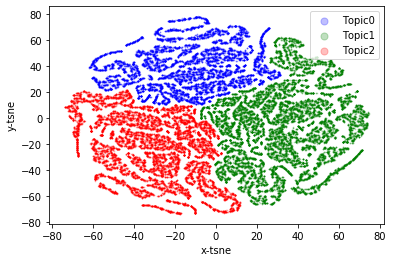

In [45]:
plot_tsne(data=lda_transform, threshold=0.75)

#### Exercise 7.09: Trying 4 Topics

In [46]:
# rerun LDA model using number of topics equal to 4

lda4 = sklearn.decomposition.LatentDirichletAllocation(
    n_components=4,  # number of topics data suggests
    learning_method="online",
    random_state=0
)
lda4.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [47]:
# run function to output raw matrices in nice table format

W_df4, H_df4 = get_topics(
    mod=lda4,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [48]:
# word-topic table

print(W_df4)

                   Topic0                 Topic1                Topic2  \
Word0   (0.0451, economy)        (0.0995, obama)     (0.1033, economy)   
Word1  (0.0334, economic)    (0.0863, president)    (0.0234, economic)   
Word2  (0.0233, minister)       (0.0496, barack)      (0.0233, growth)   
Word3     (0.0184, could)     (0.018, palestine)       (0.0194, world)   
Word4     (0.0165, would)       (0.0155, obamas)  (0.0168, government)   
Word5  (0.0146, european)        (0.0148, state)       (0.0147, china)   
Word6    (0.0141, global)   (0.0148, washington)     (0.0144, percent)   
Word7    (0.013, clinton)  (0.0141, palestinian)       (0.0128, month)   
Word8   (0.0113, britain)        (0.0128, house)     (0.0125, quarter)   
Word9     (0.0112, prime)        (0.0118, white)      (0.0115, market)   

                     Topic3  
Word0    (0.122, microsoft)  
Word1     (0.0279, windows)  
Word2     (0.0273, company)  
Word3  (0.0221, microsofts)  
Word4    (0.0217, announce)  
Word5

In [49]:
# document-topic table

print(H_df4)

                                                 Topic0  \
Doc0  (0.9496, Since 1977 our economy the guiding pr...   
Doc1  (0.9494, Industrial production fell more than ...   
Doc2  (0.9362, David Cameron today denied he was 'an...   
Doc3  (0.9358, One of them is Microsoft, which has r...   
Doc4  (0.9347, Following the United Kingdom's decisi...   
Doc5  (0.9346, US President Barack Obama will on Tue...   
Doc6  (0.9316, If you've been holding out to get the...   
Doc7  (0.9307, (CNN) President Barack Obama is makin...   
Doc8  (0.9305, WASHINGTON — President Obama expresse...   
Doc9  (0.9299, BERLIN--Uncertainty following the U.K...   

                                                 Topic1  \
Doc0  (0.9749, WASHINGTON - President Obama sounded ...   
Doc1  (0.9747, WASHINGTON — President Barack Obama s...   
Doc2  (0.9732, Palestinian Prime Minister Hamdallah ...   
Doc3  (0.973, Lombardo and partner Sonny Ward have j...   
Doc4  (0.973, Human intelligence bested by Google an...

In [51]:
# iteractive visualization

lda4_plot = pyLDAvis.sklearn.prepare(lda4, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda4_plot)

#### Exercise 7.10: TF-IDF Vectorizer

In [52]:
# convert to bag of words model
# use tf-idf method this time

vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features,
    smooth_idf=False
)
clean_vec2 = vectorizer2.fit_transform(clean_sentences)
print(clean_vec2[0])

  (0, 573)	0.4507821468344468
  (0, 558)	0.46659328459850813
  (0, 644)	0.2348350665788214
  (0, 88)	0.2807186318482775
  (0, 408)	0.6671849099770276


In [53]:
feature_names_vec2 = vectorizer2.get_feature_names()
feature_names_vec2

['abbas',
 'ability',
 'accelerate',
 'accept',
 'access',
 'accord',
 'account',
 'accused',
 'achieve',
 'acknowledge',
 'acquire',
 'acquisition',
 'across',
 'action',
 'activist',
 'activity',
 'actually',
 'addition',
 'address',
 'administration',
 'admit',
 'advance',
 'adviser',
 'affairs',
 'affect',
 'africa',
 'african',
 'afternoon',
 'agency',
 'agenda',
 'agree',
 'agreement',
 'ahead',
 'alberta',
 'allies',
 'allow',
 'almost',
 'along',
 'already',
 'although',
 'always',
 'amazon',
 'america',
 'american',
 'among',
 'amount',
 'analysis',
 'analyst',
 'android',
 'anniversary',
 'announce',
 'announcement',
 'annual',
 'another',
 'answer',
 'antonin',
 'appeal',
 'appear',
 'apple',
 'application',
 'approach',
 'approve',
 'april',
 'arabia',
 'argentina',
 'argue',
 'around',
 'arrive',
 'article',
 'asian',
 'assistant',
 'associate',
 'association',
 'attack',
 'attempt',
 'attend',
 'attention',
 'augment',
 'australia',
 'australian',
 'author',
 'authorities

#### Exercise 7.11: Non-negative Matrix Factorization

In [54]:
# define and fit nmf model

nmf = sklearn.decomposition.NMF(
    n_components=4,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    random_state=0, 
    alpha=0.1, 
    l1_ratio=0.5
)
nmf.fit(clean_vec2)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvda', l1_ratio=0.5,
    max_iter=200, n_components=4, random_state=0, shuffle=False, solver='mu',
    tol=0.0001, verbose=0)

In [55]:
# run function to produce nice output tables

W_df, H_df = get_topics(
    mod=nmf,
    vec=clean_vec2,
    names=feature_names_vec2,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [56]:
# word-topic table

print(W_df)

                         Topic0              Topic1                Topic2  \
Word0           (0.0696, obama)   (0.0628, economy)    (0.087, microsoft)   
Word1       (0.0645, president)  (0.0212, economic)     (0.0305, windows)   
Word2          (0.0484, barack)    (0.0179, growth)     (0.0196, company)   
Word3      (0.0157, washington)    (0.0144, global)    (0.0162, announce)   
Word4           (0.0149, house)     (0.0128, china)  (0.0124, microsofts)   
Word5           (0.0144, white)   (0.0111, percent)      (0.0118, update)   
Word6          (0.0127, obamas)     (0.0109, world)     (0.0106, release)   
Word7           (0.0109, state)   (0.0097, quarter)         (0.01, today)   
Word8  (0.0096, administration)    (0.0093, market)     (0.0096, surface)   
Word9           (0.0081, first)   (0.0086, country)       (0.0085, cloud)   

                        Topic3  
Word0      (0.0881, palestine)  
Word1    (0.0765, palestinian)  
Word2        (0.0309, israeli)  
Word3         (0.027

In [57]:
# document-topic table

print(H_df)

                                                 Topic0  \
Doc0  (0.0844, A makeshift racetrack in the Palestin...   
Doc1  (0.0844, (CNN) -- President Barack Obama will ...   
Doc2  (0.0844, America is emerging as a top tax have...   
Doc3  (0.0844, Microsoft wants its software to run e...   
Doc4  (0.0844, The process began in Obama's first ye...   
Doc5  (0.0844, Negative Interest Rates Benefit Globa...   
Doc6  (0.0844, South Africa's economy shrank sharply...   
Doc7  (0.0844, Conservatives mock President Barack O...   
Doc8  (0.0844, AFP ISTANBUL (AFP-Jiji) """ Six suici...   
Doc9  (0.0844, Japanese officials have raided the he...   

                                                 Topic1  \
Doc0  (0.0677, The super PAC backing New Jersey Gov....   
Doc1  (0.0677, President Obama speaks about the Nati...   
Doc2  (0.0677, Windows 10 is being offered by Micros...   
Doc3  (0.0677, President Obama is a man of many tale...   
Doc4  (0.0677, New Zealand's finance minister said o...

#### Exercise 7.12: Visualizing NMF

In [58]:
# output raw document-topic matrix for t-SNE plot

nmf_transform = nmf.transform(clean_vec2)
print(nmf_transform.shape)
print(nmf_transform)

(92946, 4)
[[5.12653315e-02 3.60582233e-15 3.19729419e-34 8.17267206e-16]
 [7.43734737e-04 2.04138105e-02 6.85552731e-15 2.11679327e-03]
 [2.92397552e-15 1.94083984e-02 4.76691813e-21 1.24269313e-18]
 ...
 [9.83404082e-06 3.41225477e-03 6.14009658e-04 3.23919592e-02]
 [6.51294966e-07 1.32359509e-07 3.32509174e-08 6.14671536e-02]
 [4.53925928e-05 1.16401194e-04 1.84755839e-02 2.00616344e-03]]


LENGTH:
92946

COUNTS:
[[    0 28973]
 [    1 32951]
 [    2 22148]
 [    3  8874]]



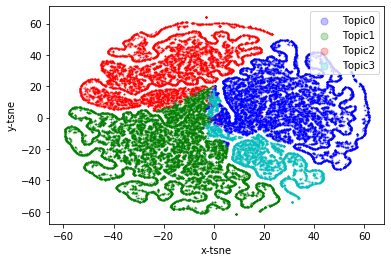

In [59]:
# run function to produce t-SNE plot

plot_tsne(data=nmf_transform, threshold=0)